
#Supermarket sales

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. The dataset contains information related to sales transactions in a supermarket. It offers insights into various aspects of product sales, customer behavior, and transaction details. The dataset can be used to analyze sales trends, customer preferences, peak shopping times, and more. It's a versatile dataset that allows for various data analysis and visualization techniques. Keep in mind that for your project, you'll need to perform data preprocessing, exploratory data analysis, and potentially apply clustering, regression, or classification techniques based on the objectives of the assignment.

First of all, is needing to import all the libraries that will be used.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import matplotlib

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs


%matplotlib inline

np.set_printoptions(precision=5, suppress=True)

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error





Next comes the part where Google Drive is mounted in the Google Colab environment, which will allow access and interaction with the files stored in the Google Drive account directly in the Colab environment.

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Importing the DataSet

In [8]:
%cd /content/drive/MyDrive/Diana_Nhachengo-Final_Project_DataMaining

/content/drive/MyDrive/Diana_Nhachengo-Final_Project_DataMaining


Reading the DataSet

In [9]:
db = pd.read_csv('./supermarket_sales - Sheet1.csv')

In [10]:
db

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [11]:
db.shape

(1000, 17)

Through the instruction above it was possible to know the dimension of the dataset, which is composed of 1000 instances and 17 attributes.


In [12]:
print("\nData Summary:")
print(db.info())


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross marg

it's possible to see that the dataset contains a total of 1000 entries (or rows), numbered from 0 to 999.
There are 17 columns (variables) in the dataset.
The following is the list of columns with details about each:
-Invoice ID; Branch; City; Customer type; Gender; Product line; Unit price; Quantity; Tax 5%; Total; Date; Time; Payment; Cogs; Gross margin percentage; Gross income; Rating.

The Data types for each column are:
7 columns with float64 data type (floating-point numbers).
1 column with int64 data type (integer numbers).
9 columns with object data type (generally representing text or categories).
The summary also provides information about non-null values in each column, which is "1000 non-null" for all columns, indicating that there are no missing values in the dataset.

The memory used by the dataset is approximately 132.9 KB.

In [13]:
db.describe(include = "all")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [14]:
db.describe(include=['O'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [15]:
db.describe(exclude=['O'])

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [16]:
db.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [17]:
db['Invoice ID'].nunique()

1000

In [18]:
id_counts = db['Invoice ID'].value_counts()

In [19]:
id_counts

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64

In [20]:
id_counts.value_counts()

1    1000
Name: Invoice ID, dtype: int64

In [21]:
dups = db.duplicated()

In [22]:
print(dups)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [23]:
print(dups.any())

False


In [24]:
print(db[dups])

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [25]:
db.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


From the statement above, it is possible to verify that the dataset does not contain null values.

In [26]:
print(db.count().sum())

17000


The number of non-null values in the dataset is 17000.

In [27]:
countValues = db.count().sum()

In [28]:
print(db.isnull().sum().sum())

0



From the statement above, it is possible to verify that the dataset does not contain null values.

In [29]:
countNull=db.isnull().sum().sum()

In [30]:
nValues=countValues+countNull

In [31]:
completeness = countValues/nValues

In [32]:
completeness='{0:.1f}%'.format(completeness*100)
print(completeness)

100.0%


# Linear regression

In [34]:
data = pd.read_csv('./supermarket_sales - Sheet1.csv')

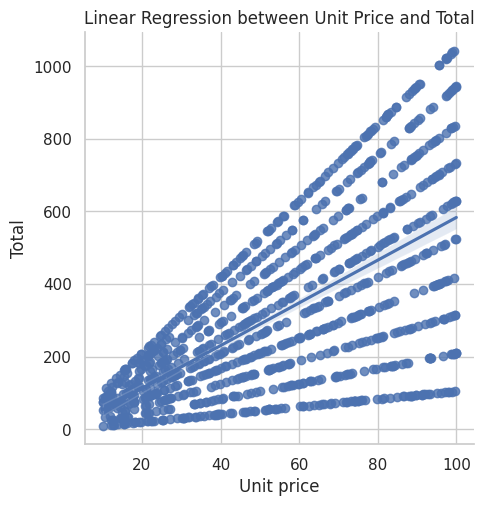

In [35]:
sns.set(style="whitegrid")

sns.lmplot(x="Unit price", y="Total", data=data)

plt.title('Linear Regression between Unit Price and Total')
plt.show()

The above graph is a visual representation of the relationship between the unit price of products and the total sales in the dataset. The linear regression line assists in understanding whether there is a linear trend between these two variables and what the direction and slope of this trend are.

Given that the regression lines are upward-sloping (positive), this indicates that, on average, an increase in the unit price is associated with an increase in total sales. Conversely, lines that are nearly horizontal suggest a weak relationship between the variables.

# Linear Correlation

<ipython-input-36-ce3e917761fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


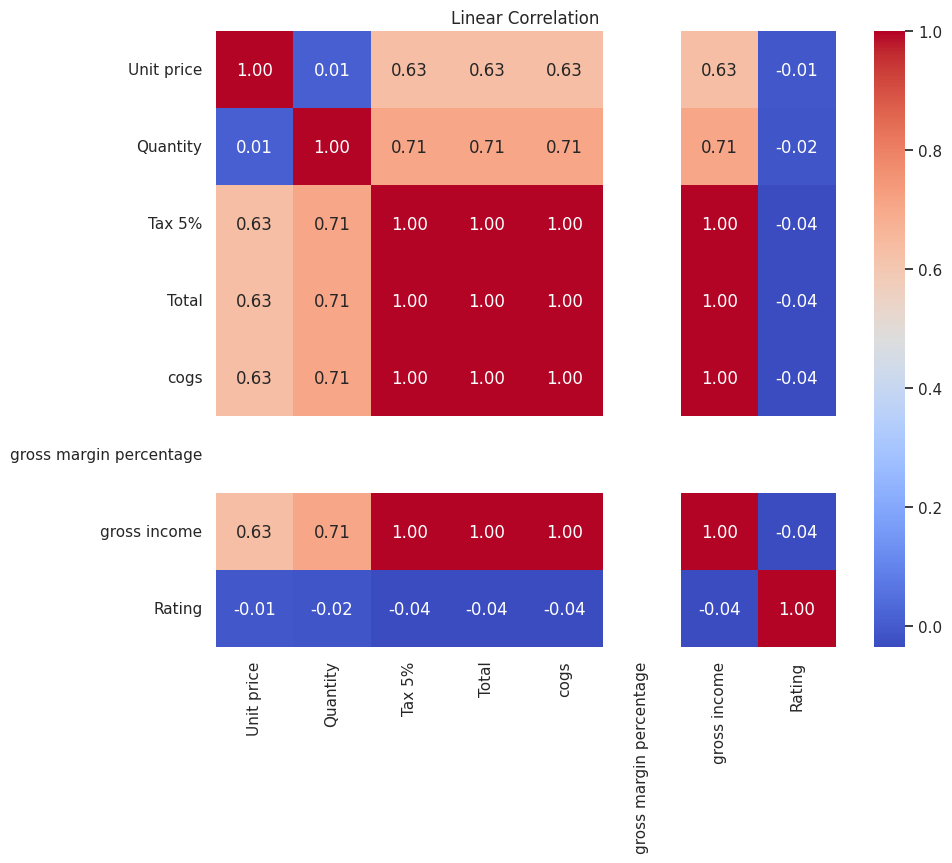

In [36]:
correlation_matrix = data.corr()

sns.set(style="white")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title('Linear Correlation')

plt.show()

A correlation heatmap chart is a valuable tool for visualizing relationships between numerical variables in a dataset. This aids in identifying which variables are more correlated with each other and can provide insights into relevant patterns or relationships within the data.

For variables with a correlation of 1, this signifies a perfect positive relationship; for example, gross income and a 5% tax, or Total and cogs.

Regarding the coloration presented on the far-right bar, we can observe that the bluer the correlation, the more likely variables in this scenario tend to have a negative correlation. Conversely, variables with a different color tend to exhibit a positive correlation.

Rating and cogs exhibit a weak negative correlation.

kmeans

In [38]:
features = data[['Unit price', 'Total']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

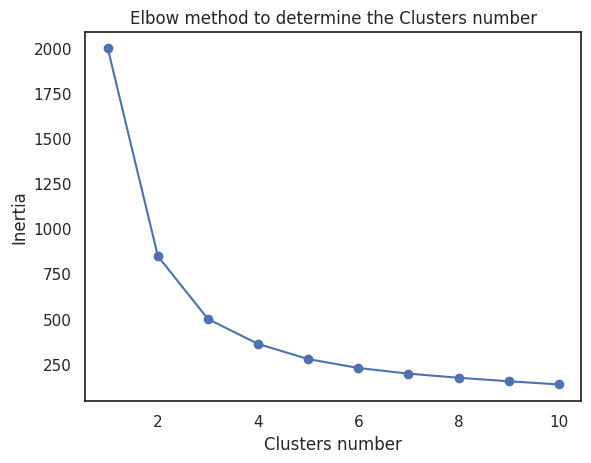

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
# Determinar o valor ideal de k usando o método Elbow
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotar o método Elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Clusters number')
plt.ylabel('Inertia')
plt.title('Elbow method to determine the Clusters number')
plt.show()

# Definir o número de clusters com base na análise do método Elbow
num_clusters = 3  # Substitua pelo valor que você escolheu

# Aplicar o K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adicionar as informações de cluster de volta à dataset original
data['Cluster'] = clusters

The chart generated by the code enables determining the optimal number of clusters using the Elbow method, and the code applies K-Means with this number of clusters. The outcome is a dataset with a cluster label assigned to each entry, which can aid in data segmentation and better comprehension of existing patterns.

In [40]:
# Definir o número de clusters com base na análise do método Elbow
num_clusters = 3  # Substitua pelo valor que você escolheu

# Aplicar o K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adicionar as informações de cluster de volta à dataset original
data['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Conclusion

Following the conducted analyses, it has been possible to verify that the dataset in question holds data of high quality. In general, the increase in the unit price of each product is directly associated with a rise in the total sales volume. Notably, the analyzed dataset is devoid of null values as well as duplicate tuples, underscoring its integrity and suitability for subsequent analyses.